In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from pydataset import data
import seaborn as sns
from env import host, user, password
import pymysql

# T-Test Exercises

### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [25]:
x = np.arange(50,150)

office_1 = stats.norm(90, 15).pdf(x)
office_2 = stats.norm(100, 20).pdf(x)

### We will use an independent T-Test here since we are comparing the means of two different groups.

### Problem sovling method:
1. Plot distributions.
2. Establish hypothesis.

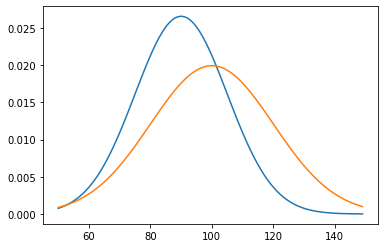

In [26]:
plt.plot(x, office_1, label= 'Office 1')
plt.plot(x, office_2, label= 'Office 2')

$H_0$ = The average time to sell homes:  $t_A$ == $t_B$

$H_a$ = The average time to sell homes:  $t_A$ !=  $t_B$

#### 3. Set significance level.

In [16]:
α = 0.05

#### 4. Verify Assumptions:

* Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
* Independent samples
* Equal Variances (or set method argument to False when not

Based on the distributions, I'm gong to assume the variances are close enough.

#### 5. Compute test statistic and probability (t-statistic & p-value) using scipy.stats.ttest_ind

In [34]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)

In [35]:
t, p

(-2.7091418459143854, 0.00811206270346016)

In [37]:
print(f'''
Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis.''')


Because the p-value (0.00811206270346016) is less than alpha value (0.05),we reject the null hypothesis.


# Load the mpg dataset and use it to answer the following questions:

#### * Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
#### * Are compact cars more fuel-efficient than the average car?
#### * Do manual cars get better gas mileage than automatic cars?

In [84]:
# Store mpg dataframe into a variable
mpg = data('mpg')

In [41]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### * Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [90]:
# Create a column that is the average of each car's city and highway gas mileage.
mpg['fuel_efficiency'] = (mpg.cty + mpg.hwy)/2

In [91]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [69]:
# Create an array that holds the fuel efficiency values for cars made in 1999
fuel_efficiency_1999 = mpg.fuel_efficiency[mpg.year == 1999]

# Create an array that holds the fuel efficiency values for cars made in 2008
fuel_efficiency_2008 = mpg.fuel_efficiency[mpg.year == 2008]


## Problem sovling method:
### 1. Plot distributions.
### 2. Establish hypothesis

Text(0.5, 1.0, '2008')

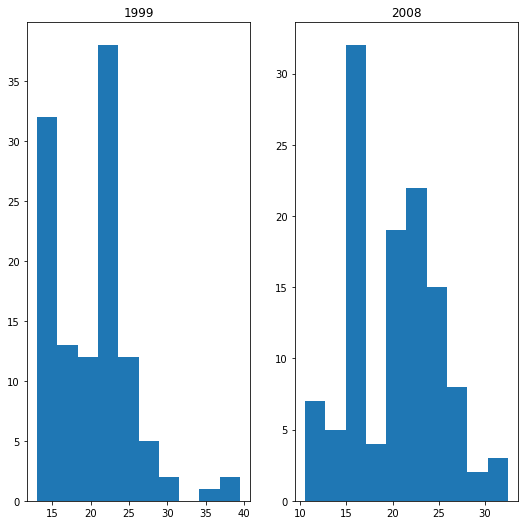

In [75]:
# Specify size of diagrams
plt.figure(figsize=(8.8,8.8))

plt.subplot(121)
plt.hist(fuel_efficiency_1999)
plt.title('1999')

plt.subplot(122)
plt.hist(fuel_efficiency_2008)
plt.title('2008')

$H_0$ = The fuel efficiency of cars made in 1999 == the fuel efficiency of cars made in 2008

$H_a$ = The fuel efficiency of cars made in 1999 != the fuel efficiency of cars made in 2008

### 3. Set significance level.

In [85]:
# Set significance level to 0.05
α = 0.05

### 4. Verify Assumptions:

* Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
* Independent samples
* Equal Variances (or set method argument to False when not

In [66]:
print(fuel_efficiency_1999.var())
print(fuel_efficiency_2008.var())

27.122605363984682
24.097480106100797


### 5. Compute test statistic and probability (t-statistic & p-value) using scipy.stats.ttest_ind

In [67]:
t, p = stats.ttest_ind(fuel_efficiency_1999, fuel_efficiency_2008)

In [68]:
t, p

(0.21960177245940962, 0.8263744040323578)

### Takeaway

* The test statistic is close to zero(0). This may indicate the two means are in fact similar
* The p-value is much greater than our significance level. 

### We fail to reject the null hypothesis.

In [82]:
fuel_efficiency_1999.mean(), fuel_efficiency_2008.mean()

(20.22222222222222, 20.076923076923077)

### * Are compact cars more fuel-efficient than the average car?

In [97]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [98]:
# Create an array that holds the values of the average fuel efficiency of compact cars.
compact_fe = mpg[mpg['class'] == 'compact'].fuel_efficiency

# Create an array that holds the values of the average fuel efficiency of midsized cars.
midsized_fe = mpg[mpg['class'] == 'midsize'].fuel_efficiency

## Problem Solving Method

### 1. Plot the distributions of the two attributes that are being compared

Text(0.5, 1.0, 'Midsize')

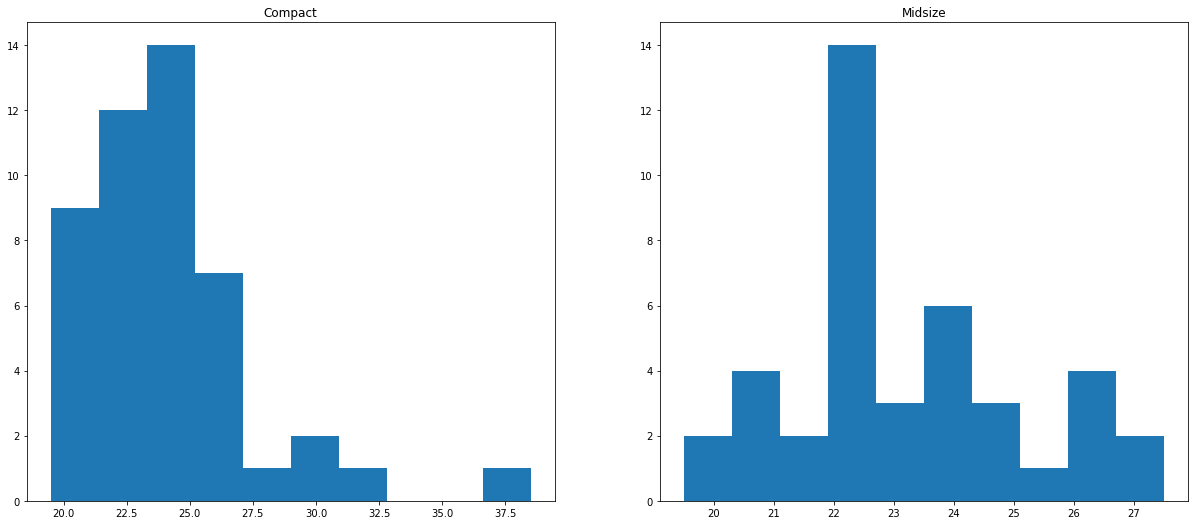

In [102]:
plt.figure(figsize = (20.8, 8.8))
plt.subplot(121)
plt.hist(compact_fe)
plt.title('Compact')

plt.subplot(122)
plt.hist(midsized_fe)
plt.title('Midsize')

### 2. Create your hypothesis.

$H_0$ = The fuel efficiency of compact cars == the fuel efficiency of average cars.

$H_a$ = The fuel efficiency of compact cars > the fuel efficiency of average cars.

### 3. Set significance level

In [106]:
α = 0.05

### 4. Verify your assumptions

* Is the data normally distributed or at least 30 observations and 'kinda' normal?  Yes
* Are the two groups independent?  Yes
* Equal Variance?  No --> set equal_var to False

In [109]:
print(compact_fe.var())
print(midsized_fe.var())

12.442876965772433
3.8118902439024374


### 5. Compute test statistic and probability (t-statistic & p-value) using scipy.stats.ttest_ind

In [111]:
t, p = stats.ttest_ind(compact_fe, midsized_fe, equal_var=False)

In [115]:
t, p/2

(1.9869420198494934, 0.025326829695052448)

## Takeaways

* The test statistic > 0. This may indicate the fuel efficiency of compact cars are greater than midsized cars.
* The p-value is greater than our significance level.

### We fail to reject our null hypothesis.

In [116]:
compact_fe.mean(), midsized_fe.mean()

(24.21276595744681, 23.024390243902438)

### * Do manual cars get better gas mileage than automatic cars?

In [117]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [122]:
# Create an array that holds values for the average fuel efficiency for automatic transmission cars.
auto_fe = mpg[mpg['trans'].str.contains('auto')].fuel_efficiency

# Create an array that holds values for the average fuel efficiency for manual transmission cars.
manual_fe = mpg[mpg['trans'].str.contains('manual')].fuel_efficiency

In [129]:
auto_fe.describe()

count    157.000000
mean      19.130573
std        4.684312
min       10.500000
25%       15.000000
50%       19.000000
75%       22.500000
max       35.000000
Name: fuel_efficiency, dtype: float64

In [130]:
manual_fe.describe()

count    77.000000
mean     22.227273
std       5.160927
min      10.500000
25%      19.500000
50%      22.000000
75%      25.000000
max      39.500000
Name: fuel_efficiency, dtype: float64

## Problem Solving Process:

### 1. Plot the distributions of the attributes being compared.

Text(0.5, 1.0, 'Manual Transmission')

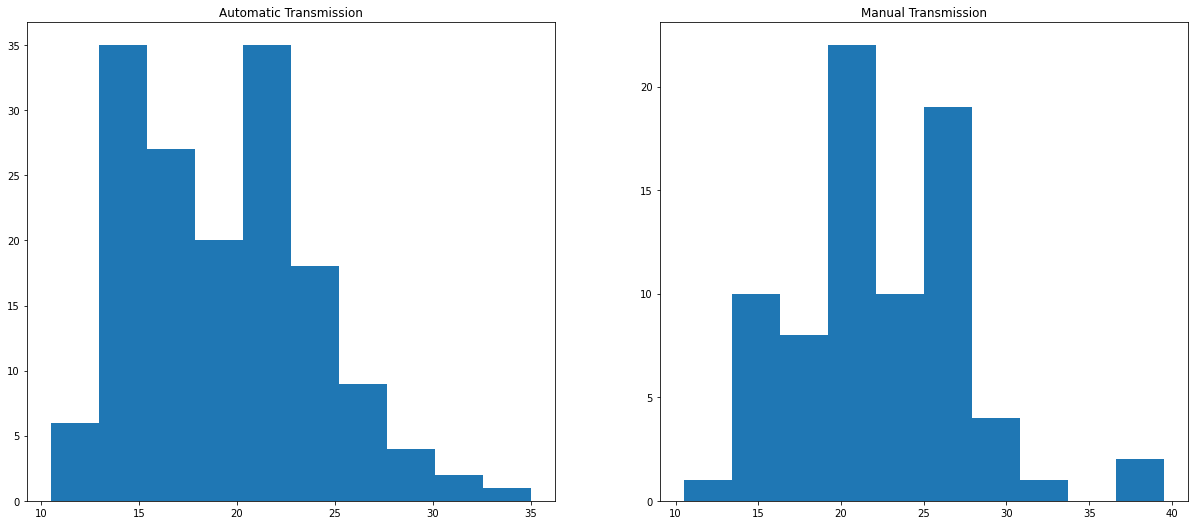

In [123]:
# Set figure sizes.
plt.figure(figsize = (20.8, 8.8))

plt.subplot(121)
plt.hist(auto_fe)
plt.title('Automatic Transmission')

plt.subplot(122)
plt.hist(manual_fe)
plt.title('Manual Transmission')




### 2. Create hypothesis.

$H_0$ = The fuel efficiency of manual cars == the fuel efficiency of automatic cars.

$H_a$ = The average fuel efficiency of manual cars > the average fuel efficiency of automatic cars.

### 3. Set significance level.

In [131]:
α = 0.05

### 4. Verify your assumptions

* Is the data normally distributed or at least 30 observations and 'kinda' normal?  Yes
* Are the two groups independent?  Yes
* Equal Variance?  Yes

In [132]:
print(auto_fe.var())
print(manual_fe.var())

21.942777233382337
26.635167464114826


In [133]:
# stats Levene test - returns p value. small p-value means unequal variances
stats.levene(auto_fe, manual_fe)

# high p-value suggests that the populations have equal variances

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

### 5. Compute test statistic and probability (t-statistic & p-value) using scipy.stats.ttest_ind

In [134]:
t, p = stats.ttest_ind(auto_fe, manual_fe)

In [135]:
t, p/2

(-4.593437735750014, 3.5771872005728416e-06)

## Takeaways

#### * Our t-statistic has a pretty high negative value. This may indicate that automatic transmission cars have a lower fuel efficiency.
#### * Our p-value is below our significance level. 

## We reject our null hypothsis that the fuel efficiency is the same across the transmission types.

In [136]:
auto_fe.mean(), manual_fe.mean()

(19.130573248407643, 22.227272727272727)

# Correlation Exercises

# 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [137]:
# Create dataframe of telco_churn data
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
df = pd.read_csv(url, index_col="id")
df.head(4)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_int,payment_type,monthly_charges,...,tenure_month,has_churned,has_phone,has_internet,has_internet_and_phone,partner_dependents,start_day,phone_type,internet_type,contract_type
id,,,,,,,,,,,,,,,,,,,,,
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,9.0,False,True,True,True,3,2020-05-03,One Line,DSL,1 Year
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,9.1,False,True,True,True,0,2020-05-03,Two or More Lines,DSL,Month-to-Month
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,3.8,True,True,True,True,0,2020-11-03,One Line,Fiber Optic,Month-to-Month
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,12.6,True,True,True,True,1,2020-02-03,One Line,Fiber Optic,Month-to-Month


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   is_senior_citizen       7032 non-null   int64  
 3   partner                 7032 non-null   object 
 4   dependents              7032 non-null   object 
 5   phone_service           7032 non-null   int64  
 6   internet_service        7032 non-null   int64  
 7   contract_int            7032 non-null   int64  
 8   payment_type            7032 non-null   object 
 9   monthly_charges         7032 non-null   float64
 10  total_charges           7032 non-null   float64
 11  churn                   7032 non-null   object 
 12  tenure_month            7032 non-null   float64
 13  has_churned             7032 non-null   bool   
 14  has_phone               7032 non-null   

In [138]:
df.describe()

,is_senior_citizen,phone_service,internet_service,contract_int,monthly_charges,total_charges,tenure_month,partner_dependents
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,1.325085,1.223976,0.688851,64.790636,2283.409094,32.433831,1.080631
std,0.368844,0.642546,0.778958,0.832870,30.101932,2266.871139,24.578505,1.225719
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.500000,401.762500,8.800000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,28.850000,1.000000
75%,0.000000,2.000000,2.000000,1.000000,89.900000,3794.737500,55.300000,2.000000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.300000,3.000000


In [146]:
df.shape

(7032, 22)

In [143]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_int', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure_month',
       'has_churned', 'has_phone', 'has_internet', 'has_internet_and_phone',
       'partner_dependents', 'start_day', 'phone_type', 'internet_type',
       'contract_type'],
      dtype='object')

In [148]:
# Check to see if tenure is an integer and monthly_charges is a float
df.dtypes

customer_id                object
gender                     object
is_senior_citizen           int64
partner                    object
dependents                 object
phone_service               int64
internet_service            int64
contract_int                int64
payment_type               object
monthly_charges           float64
total_charges             float64
churn                      object
tenure_month              float64
has_churned                  bool
has_phone                    bool
has_internet                 bool
has_internet_and_phone       bool
partner_dependents          int64
start_day                  object
phone_type                 object
internet_type              object
contract_type              object
dtype: object

In [155]:
tenure = df['tenure_month']
monthly_charges = df['monthly_charges']
total_charges = df['total_charges']

id
0        9.0
1        9.1
2        3.8
3       12.6
4        3.2
        ... 
7038    43.4
7039     1.0
7040    47.3
7041     6.7
7042     1.0
Name: tenure_month, Length: 7032, dtype: float64

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


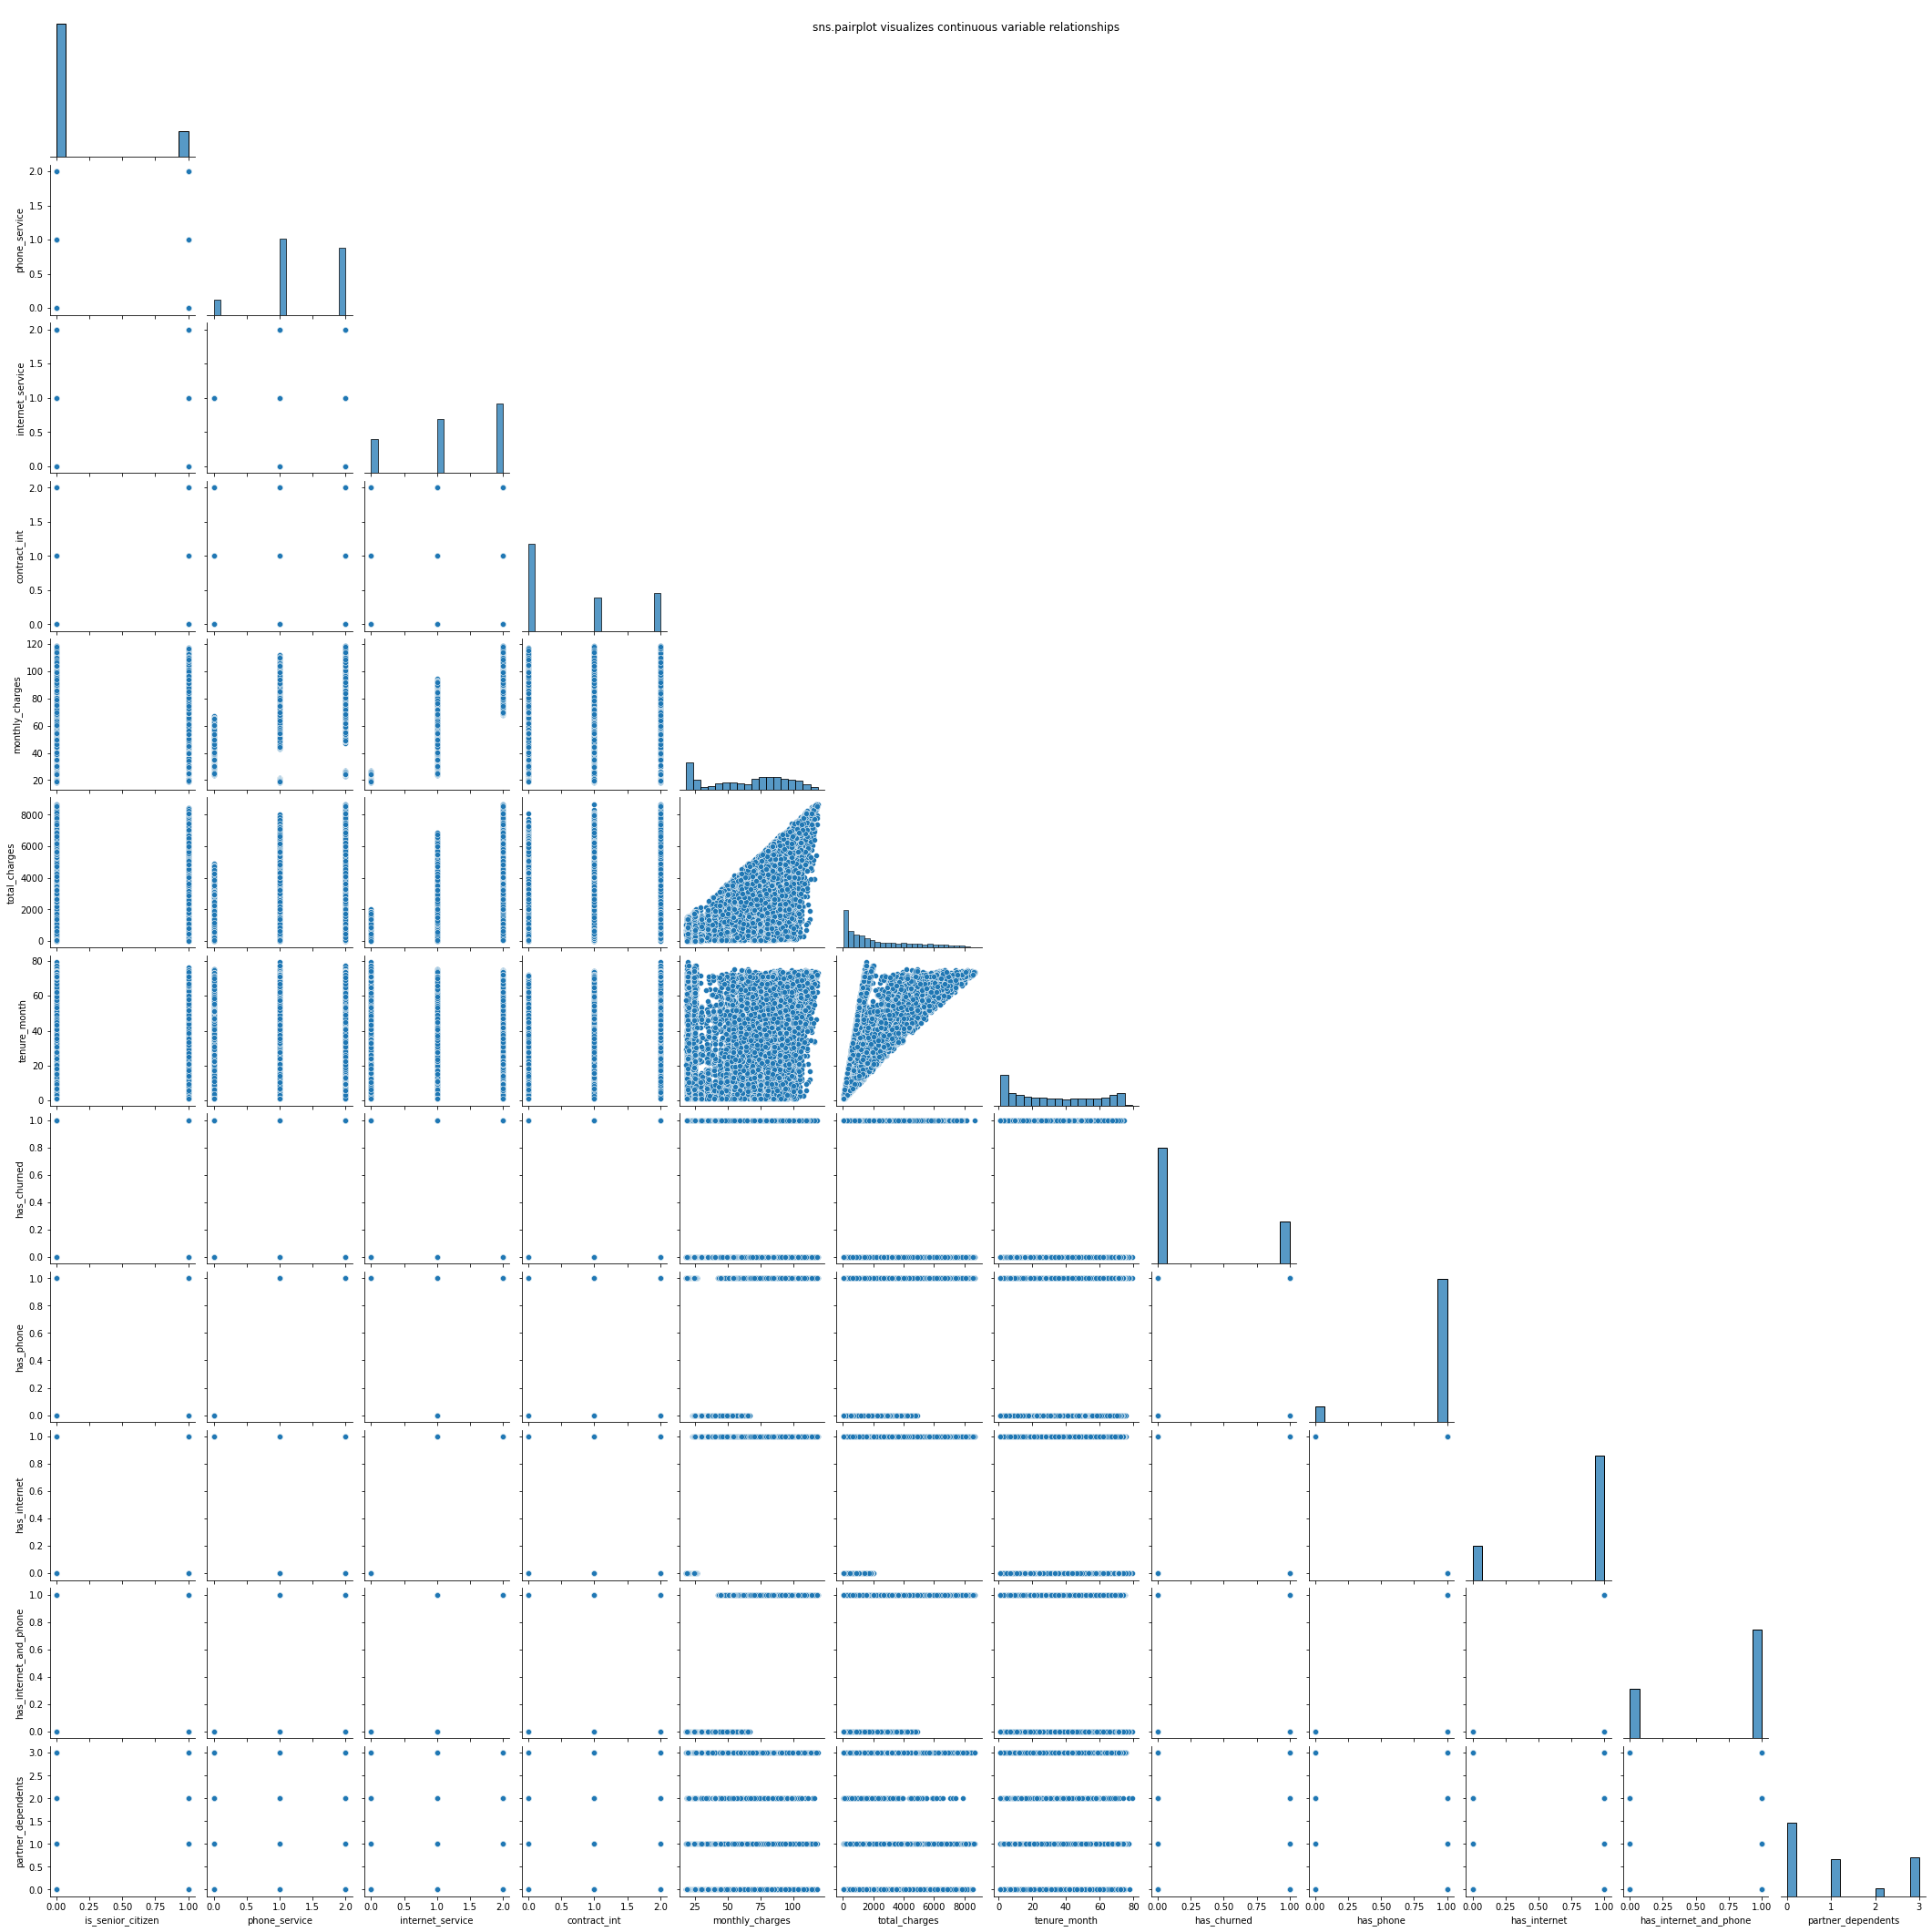

In [154]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

Text(0, 0.5, 'total charges')

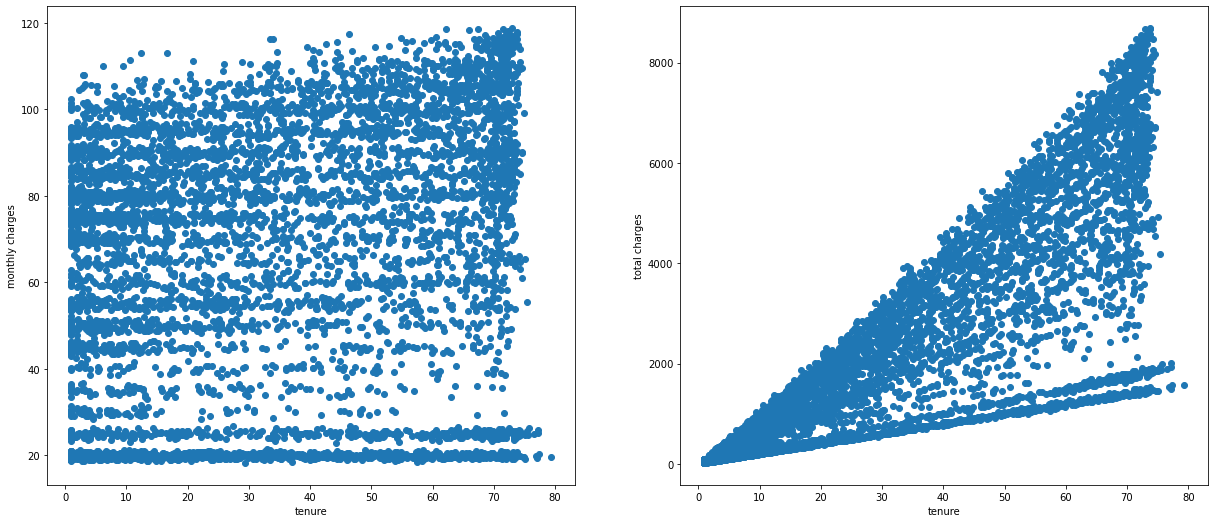

In [161]:
plt.figure(figsize=(20.8, 8.8))

plt.subplot(121)
plt.scatter(tenure, monthly_charges)
plt.xlabel('tenure')
plt.ylabel('monthly charges')

plt.subplot(122)
plt.scatter(tenure, total_charges)
plt.xlabel('tenure')
plt.ylabel('total charges')

In [163]:
# Check for correlation between tenure and monthly_charges.
corr, p = stats.pearsonr(tenure, monthly_charges)
corr, p

(0.24602222678861568, 1.8834273042626366e-97)

### Takeaways:

#### * Pearson's correlation coefficient is pretty low. It doesn't suggest a strong correlation.
#### * The p-value is less than our significance level.

### We reject the null hypothesis that there is no linear correlation between tenure and monthly charge.

In [162]:
# Check for correlation between tenure and total_charges.
corr, p = stats.pearsonr(tenure, total_charges)
corr, p

(0.8257328669183064, 0.0)

### Takeaways:

####  * Pearson's correlation coefficient is fairly high. This suggests there is a strong positive correlation.
#### * The p-value is zero. 

### We reject the null hypothesis that there is no correlation between tenure and total charges.

### What happens when you control for phone and internet service?

In [165]:
df.phone_service.value_counts()

1    3386
2    2966
0     680
Name: phone_service, dtype: int64

In [167]:
df.internet_type.value_counts()

Fiber Optic            3097
DSL                    2413
No Internet Service    1522
Name: internet_type, dtype: int64

## How to Control for Variables

#### * Perform your original analysis in a way that removes the variable we're trying to control out of the question.
#### * If we control for phone service, and test for linear correlation between tenure and monthly_charges, then we will create a no_phone and a phone group then check their tenure to monthly_charges correlation w/ the Pearson's test
#### * If we also control for internet connection, we'll need to produce each pairing of subsets

In [168]:
# Combine each customers' setup.
df["telco_products"] = df.internet_type + " " + df.phone_type
df.head().T

id,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
is_senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
phone_service,1,2,1,1,1
internet_service,1,1,2,2,2
contract_int,1,0,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check
monthly_charges,65.6,59.9,73.9,98.0,83.9


In [170]:
df.telco_products.value_counts()

Fiber Optic Two or More Lines            1937
No Internet Service One Line             1182
Fiber Optic One Line                     1160
DSL One Line                             1044
DSL Two or More Lines                     689
DSL No Phone Service                      680
No Internet Service Two or More Lines     340
Name: telco_products, dtype: int64

In [172]:
options = df.telco_products.value_counts().index

options

Index(['Fiber Optic Two or More Lines', 'No Internet Service One Line',
       'Fiber Optic One Line', 'DSL One Line', 'DSL Two or More Lines',
       'DSL No Phone Service', 'No Internet Service Two or More Lines'],
      dtype='object')

In [214]:
len(options)

7

In [175]:
# Create a function that'll run a correlation test when given two paramaters.
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

In [211]:
output = []

for option in options:
    subset = df[df.telco_products == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.monthly_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
tenure_vs_monthly_charges = pd.DataFrame(output)
tenure_vs_monthly_charges

Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.573677,6.125936e-170,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No Internet Service One Line,-0.012010,6.799938e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...
2,Fiber Optic One Line,0.529938,5.607453e-85,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL One Line,0.561734,7.199649e-88,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Two or More Lines,0.610191,1.647669e-71,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No Phone Service,0.591798,1.736039e-65,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Internet Service Two or More Lines,-0.031353,5.645227e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...


In [185]:
fiber_two_or_more_lines = df[df.telco_products == 'Fiber Optic Two or More Lines']

In [186]:
fiber_two_or_more_lines

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_int,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_internet_and_phone,partner_dependents,start_day,phone_type,internet_type,contract_type,telco_products
id,,,,,,,,,,,,,,,,,,,,,
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,...,False,True,True,True,1,2015-11-03,Two or More Lines,Fiber Optic,2 Year,Fiber Optic Two or More Lines
11,0017-IUDMW,Female,0,Yes,Yes,2,2,2,Credit card (automatic),116.80,...,False,True,True,True,3,2015-02-03,Two or More Lines,Fiber Optic,2 Year,Fiber Optic Two or More Lines
13,0019-EFAEP,Female,0,No,No,2,2,2,Bank transfer (automatic),101.30,...,False,True,True,True,0,2015-03-03,Two or More Lines,Fiber Optic,2 Year,Fiber Optic Two or More Lines
15,0020-INWCK,Female,0,Yes,Yes,2,2,2,Credit card (automatic),95.75,...,False,True,True,True,3,2015-03-03,Two or More Lines,Fiber Optic,2 Year,Fiber Optic Two or More Lines
17,0021-IKXGC,Female,1,No,No,2,2,0,Electronic check,72.10,...,False,True,True,True,0,2021-01-03,Two or More Lines,Fiber Optic,Month-to-Month,Fiber Optic Two or More Lines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,9957-YODKZ,Male,1,Yes,No,2,2,0,Electronic check,80.80,...,False,True,True,True,1,2020-09-03,Two or More Lines,Fiber Optic,Month-to-Month,Fiber Optic Two or More Lines
7018,9958-MEKUC,Male,0,Yes,Yes,2,2,2,Credit card (automatic),103.95,...,False,True,True,True,3,2015-02-03,Two or More Lines,Fiber Optic,2 Year,Fiber Optic Two or More Lines
7019,9959-WOFKT,Male,0,No,Yes,2,2,2,Bank transfer (automatic),106.70,...,False,True,True,True,2,2015-05-03,Two or More Lines,Fiber Optic,2 Year,Fiber Optic Two or More Lines


In [189]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_int', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure_month',
       'has_churned', 'has_phone', 'has_internet', 'has_internet_and_phone',
       'partner_dependents', 'start_day', 'phone_type', 'internet_type',
       'contract_type', 'telco_products'],
      dtype='object')

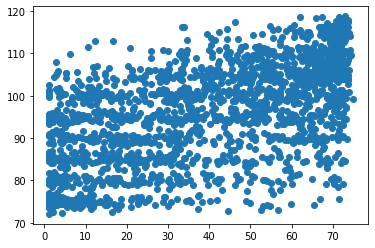

In [192]:
plt.scatter('tenure_month', 'monthly_charges', data=fiber_two_or_more_lines)

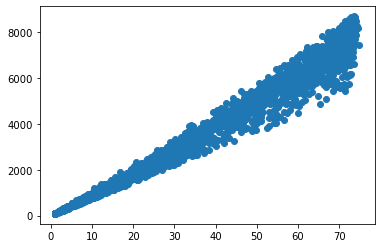

In [193]:
plt.scatter('tenure_month', 'total_charges', data=fiber_two_or_more_lines)

In [225]:
def plot_scatter(df, x, y):
    options = df.telco_products.value_counts().index
    n = 1
    for option in options:
        new_df = df[df.telco_products == option]
        
        plt.figure(figsize=(20.8,20.8))
        plt.subplot(len(options), 1, n)        
        plt.scatter(x, y, data = new_df)
        plt.title(option)
        plt.xlabel(x)
        plt.ylabel(y)
        
        n += 1

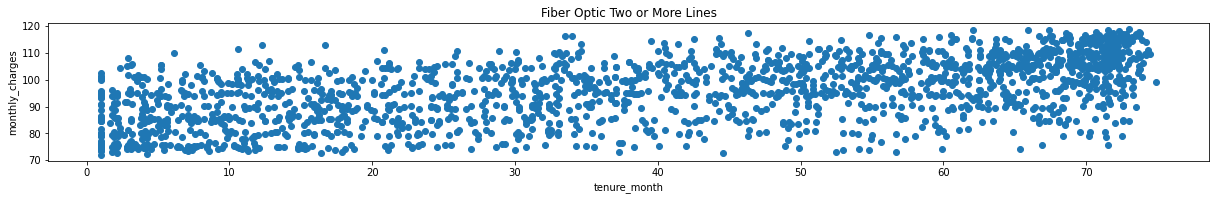

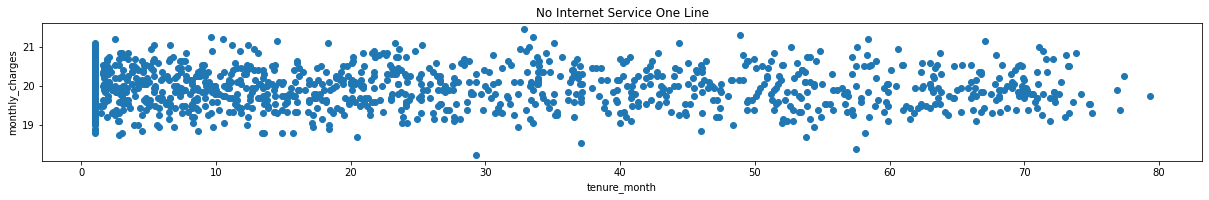

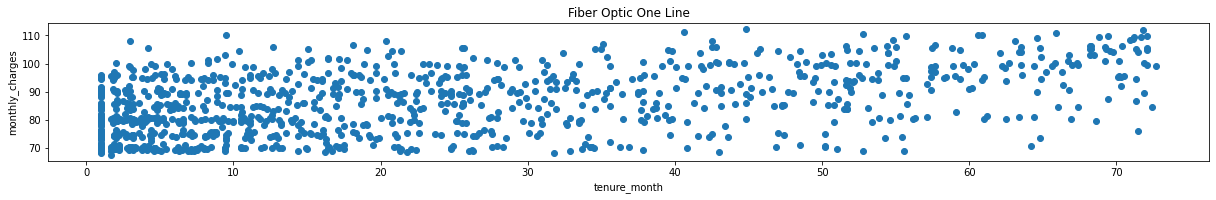

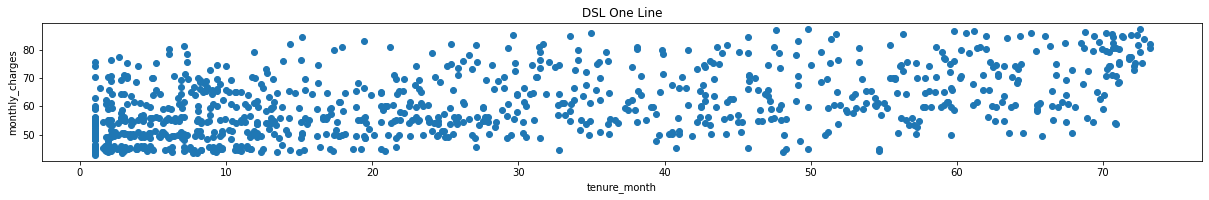

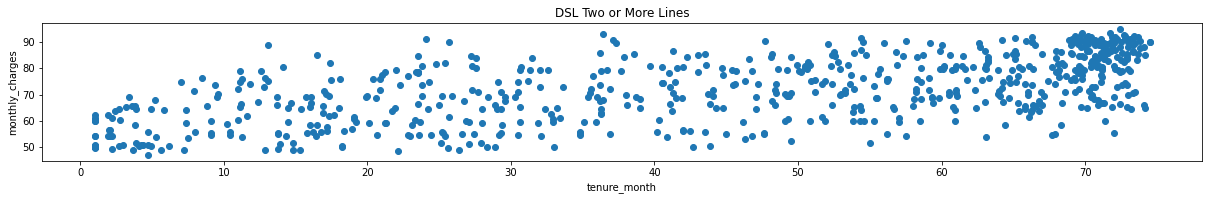

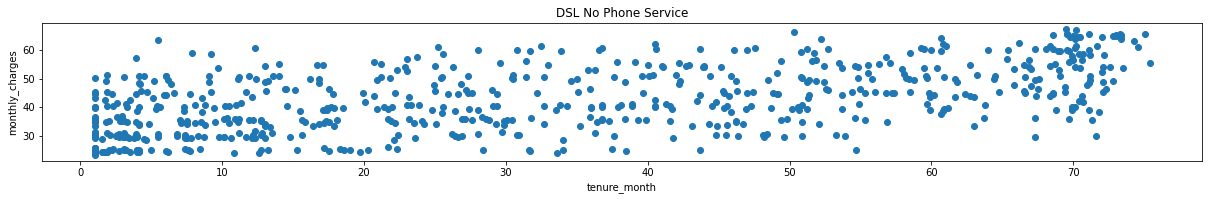

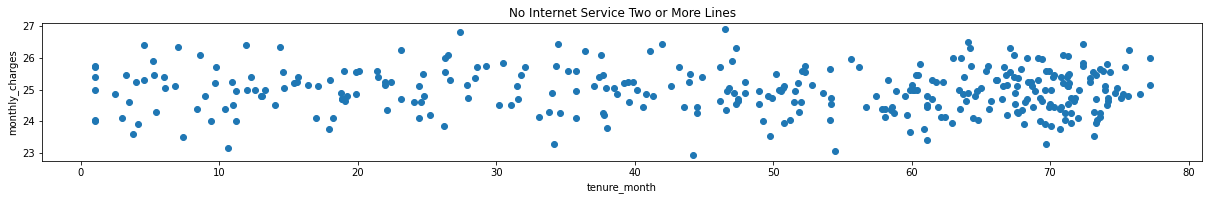

In [226]:
plot_scatter(df, 'tenure_month', 'monthly_charges')

In [227]:
output = []

for option in options:
    subset = df[df.telco_products == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.total_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
tenure_vs_monthly_charges = pd.DataFrame(output)
tenure_vs_monthly_charges

Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.983949,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No Internet Service One Line,0.999276,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
2,Fiber Optic One Line,0.987473,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL One Line,0.974246,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Two or More Lines,0.967037,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No Phone Service,0.954261,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Internet Service Two or More Lines,0.998031,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...


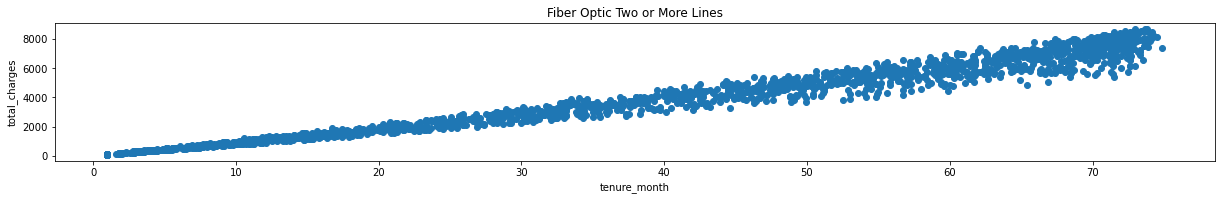

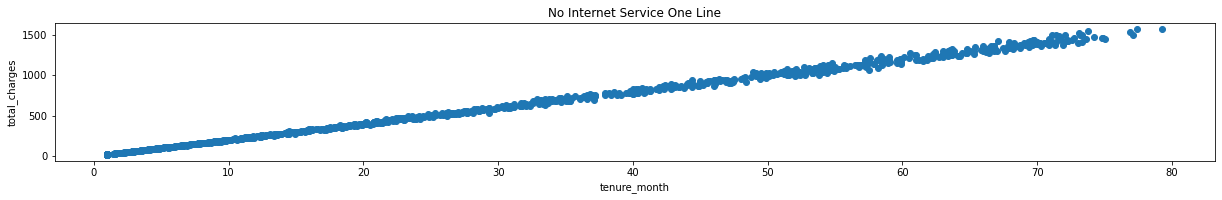

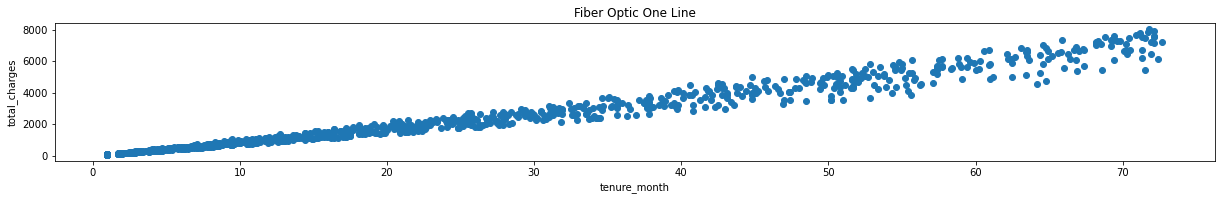

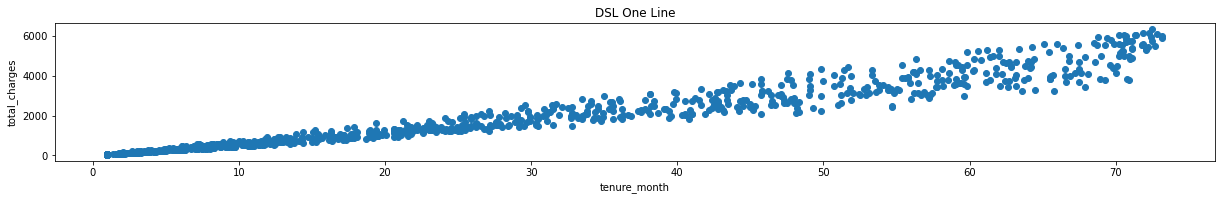

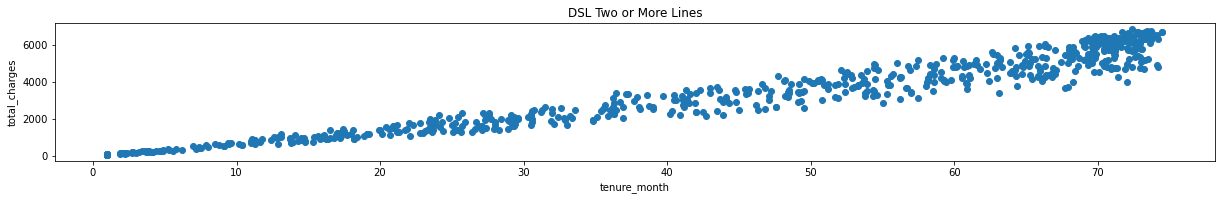

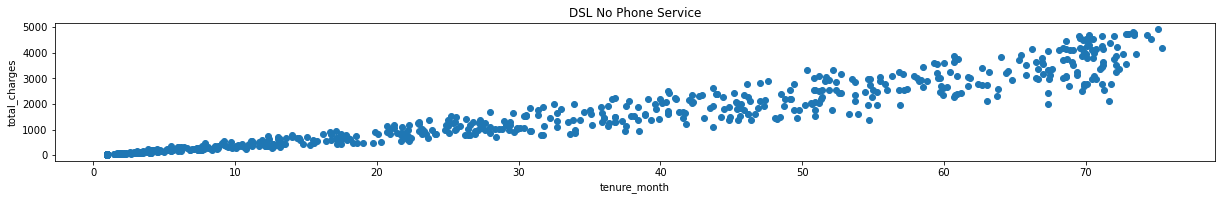

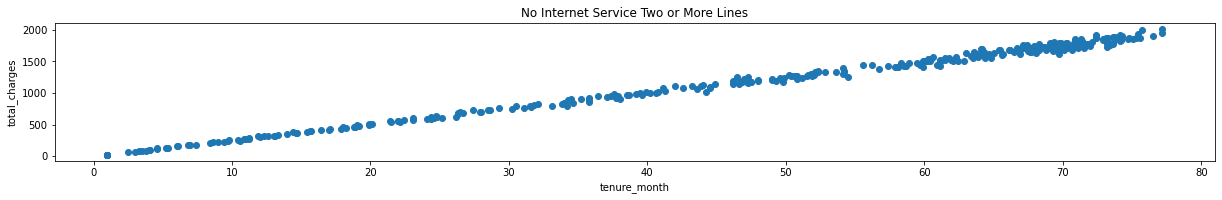

In [228]:
plot_scatter(df, 'tenure_month', 'total_charges')

# 2. Use the employees database.

#### * Is there a relationship between how long an employee has been with the company and their salary?


#### * Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [236]:
def get_db_url(username, password, hostname, database):
    
    return f'mysql+pymysql://{username}:{password}@{hostname}/{database}'

In [239]:
url = get_db_url(user, password, host, 'employees')

In [238]:
sql = """
select datediff(curdate(), hire_date) as days_on_job, salary
from employees
join salaries using(emp_no)
where to_date > curdate();
"""

In [240]:
employees_df = pd.read_sql(sql, url)

In [243]:
correlation_test(employees_df.days_on_job, employees_df.salary)

(0.3064625613186078,
 0.0,
 'reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

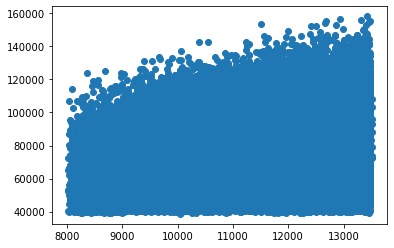

In [244]:
plt.scatter(employees_df.days_on_job, employees_df.salary)

In [245]:
sql = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""

In [246]:
employees_df2 = pd.read_sql(sql, url)

In [252]:
employees_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   emp_no       300024 non-null  int64
 1   title_count  300024 non-null  int64
 2   days_on_job  300024 non-null  int64
dtypes: int64(3)
memory usage: 6.9 MB


In [249]:
correlation_test(employees_df2.days_on_job, employees_df2.title_count)

(0.2665989299136619,
 0.0,
 'reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

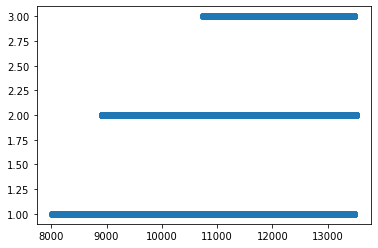

In [254]:
plt.scatter('days_on_job','title_count', data = employees_df2)

# 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [255]:
sleep_df = data('sleepstudy')

In [256]:
sleep_df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


### Takeaways

In [258]:
correlation_test(sleep_df.Days, sleep_df.Reaction)

(0.5352302262650253,
 9.894096322214812e-15,
 'reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

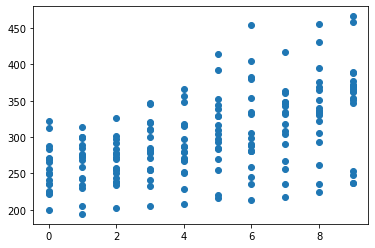

In [259]:
plt.scatter('Days', 'Reaction', data=sleep_df)